In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,RandomFlip,RandomRotation,RandomZoom,RandomTranslation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical,image_dataset_from_directory
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [ ]:
tf.__version__

'2.18.0'

In [ ]:
# Label	Description
# 0	airplane
# 1	automobile
# 2	bird
# 3	cat
# 4	deer
# 5	dog
# 6	frog
# 7	horse
# 8	ship
# 9	truck
lst_dict_labels = {"0":"airplane","1":"automobile","2":"bird","3":"cat","4":"deer","5":"dog","6":"frog","7":"horse","8":"ship",
                   "9":"truck"}

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
X_train_partial, X_validation, y_train_partial, y_test_validation = train_test_split(
    x_train, y_train, test_size=0.33, random_state=42)


In [ ]:
X_train_partial.shape
X_validation.shape

(16500, 32, 32, 3)

In [ ]:
early_stopping  = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
X_train_partial = X_train_partial/255.0
X_validation = X_validation/255.0

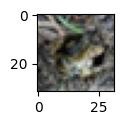

In [ ]:
x_train.shape
index_img = random.randint(0,len(x_train))
test_img = x_train[index_img]

fig,ax = plt.subplots(figsize=(1,1))
ax.imshow(test_img)
plt.show()


In [ ]:
data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
    RandomTranslation(0.1, 0.1)
])

model = Sequential([
    Input(shape=(32,32,3)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(512,activation='relu'),
    Dense(10,activation='softmax')
])
model.summary()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 900,746 (3.44 MB)

 Trainable params: 900,746 (3.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train_partial,y_train_partial,epochs=30,validation_data=(X_validation,y_test_validation),batch_size=128,callbacks=[early_stopping])

Epoch 1/30
262/262 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.2303 - loss: 4.6494 - val_accuracy: 0.4555 - val_loss: 1.4938
Epoch 2/30
262/262 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.4483 - loss: 1.5308 - val_accuracy: 0.5210 - val_loss: 1.3456
Epoch 3/30
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5100 - loss: 1.3705 - val_accuracy: 0.5580 - val_loss: 1.2316
Epoch 4/30
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5515 - loss: 1.2573 - val_accuracy: 0.5978 - val_loss: 1.1701
Epoch 5/30
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5901 - loss: 1.1664 - val_accuracy: 0.6072 - val_loss: 1.1159
Epoch 6/30
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.6094 - loss: 1.1021 - val_accuracy: 0.6411 - val_loss: 1.0455
Epoch 7/30
262/262 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.6296 - loss: 1.0559 - val_accuracy: 0.6304 - val_loss: 1.0636
Epoch 8/30
262/262 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6542 - loss: 0.9825 - val_accu

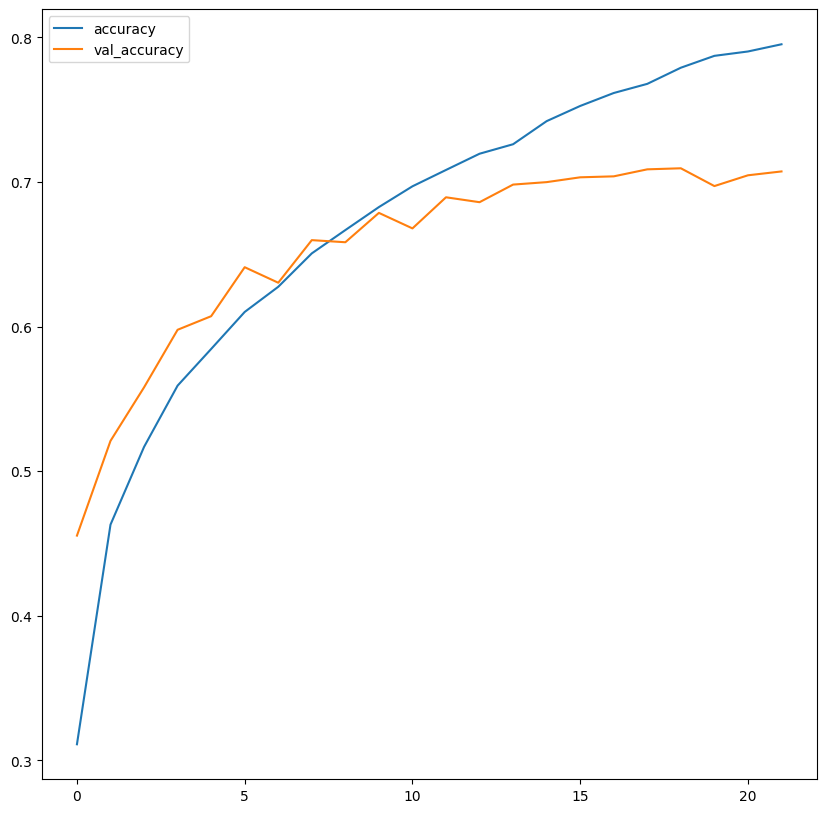

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
ax.plot(history.history['accuracy'],label='accuracy')
ax.plot(history.history['val_accuracy'],label='val_accuracy')
ax.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7094 - loss: 0.8610
Test Accuracy: 0.7092


In [ ]:
model.save("cifar10_saved_model.h5")

In [ ]:
# Load the saved .h5 model
model = tf.keras.models.load_model("cifar10_saved_model.h5")

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]  # optional
converter.exclude_conversion_metadata = True

tflite_model = converter.convert()

# Save the TFLite model
with open("cifar10_model.tflite", "wb") as f:
    f.write(tflite_model)

print("TFLite model saved as 'cifar10_model.tflite'")

Saved artifact at '/tmp/tmp60dy6ojx'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132131178783440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132131178784400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132131178787856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132130384210128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132130384210320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132130384209360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132130384211088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132130384207824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132130384208016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132130384207632: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model sav

In [ ]:
#Loading TFLite

import numpy as np
import tensorflow as tf

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path="cifar10_model.tflite")
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input shape:", input_details[0]['shape'])

Input shape: [ 1 32 32  3]


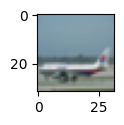

In [ ]:
#Testing the TF Lite model
ind_img = random.randint(0,x_test.shape[0])
x_test_img = x_test[ind_img]
fig,ax = plt.subplots(figsize=(1,1))
ax.imshow(x_test_img)
plt.show()
x_test_img = np.expand_dims(x_test_img ,axis=0).astype(np.float32)

In [ ]:
interpreter.set_tensor(input_details[0]['index'], x_test_img)

# Run inference
interpreter.invoke()

# Get output tensor
output_data = interpreter.get_tensor(output_details[0]['index'])
predicted_label = np.argmax(output_data)

print(f"✅ Predicted: {predicted_label},{lst_dict_labels[str(predicted_label)]}, True: {0}")

✅ Predicted: 4,deer, True: 0


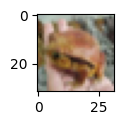

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
✅ Predicted: 4,deer, True: 0


In [ ]:
model_cifar = tf.keras.models.load_model("cifar10_saved_model.h5")

ind_img = random.randint(0,x_test.shape[0])
x_test_img = x_test[ind_img]
fig,ax = plt.subplots(figsize=(1,1))
ax.imshow(x_test_img)
plt.show()
x_test_img = np.expand_dims(x_test_img ,axis=0).astype(np.float32)

predict = model_cifar.predict(x_test_img)
predicted_label = np.argmax(predict)
print(f"✅ Predicted: {predicted_label},{lst_dict_labels[str(predicted_label)]}, True: {0}")

In [ ]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image, ImageDraw


def box(file: str, p_path_nms_model, p_th, p_boxes):
  leaves = []
  image = Image.open(f"images/{file}")
  file_name, ext = os.path.splitext(os.path.basename(image.filename))
  os.makedirs(f"images/croped", exist_ok=True)

  # tf_image_resized = image.resize((640, 640))
  tf_interpreter = tf.lite.Interpreter(model_path=p_path_nms_model)
  tf_interpreter.allocate_tensors()
  tf_in_details = tf_interpreter.get_input_details()
  tf_out_details = tf_interpreter.get_output_details()
  # Model expects 640x640 input (assumed) Because model.export(format="tflite") --> 640 by default
  tf_image_width = tf_in_details[0]['shape'][2]
  tf_image_height = tf_in_details[0]['shape'][1]
  # tf_image = Image.open(p_path_image).convert("RGB")
  tf_image_resized = image.copy().convert("RGB")
  tf_image_resized = tf_image_resized.resize((tf_image_width, tf_image_height))
  tf_image_np = np.array(tf_image_resized, dtype=np.float32) / 255.0
  tf_image_np = np.expand_dims(tf_image_np, axis=0)
  # print(f"Image to be processed:{tf_image_np.shape}")

  #Run inference or prediction
  tf_interpreter.set_tensor(tf_in_details[0]['index'], tf_image_np)
  tf_interpreter.invoke()

  # Get predictions from NMS model
  tf_output = tf_interpreter.get_tensor(tf_out_details[0]['index'])[0]  # shape: [300, 6]
  # print(f"Output shape: {tf_output.shape}")
  tf_draw = ImageDraw.Draw(tf_image_resized)
  tf_threshold = p_th
  for i, det in enumerate(tf_output):
    x1, y1, x2, y2, score, cls = det
    if score >= tf_threshold:
        x1 = int(x1 * tf_image_width)  #To get the coordinate to the image shape 640x640
        y1 = int(y1 * tf_image_height)
        x2 = int(x2 * tf_image_width)
        y2 = int(y2 * tf_image_height)
        if p_boxes:
          print(f"Score:{score:.2f},Box:{x1,y1,x2,y2}")
        tf_draw.rectangle([x1, y1, x2, y2], outline="blue", width=3)
        tf_draw.text((x1, y1), f"Class {int(cls)}: {score:.2f}", fill="red")
        i_filename = f"images/croped/{file_name}-{i}{ext}"
        tf_image_resized.crop((x1, y1, x2, y2)).save(i_filename)
        leaves.append(i_filename)

  return leaves



In [ ]:
image = "leaves.png"
_ = box(image, "yolo11n_model_1_float16.tflite", 0.6, True)

Score:0.94,Box:(231, 161, 362, 282)
Score:0.94,Box:(296, 45, 394, 166)
Score:0.93,Box:(455, 224, 600, 323)
Score:0.93,Box:(308, 232, 451, 338)
Score:0.93,Box:(279, 391, 376, 501)
Score:0.92,Box:(156, 105, 290, 218)
Score:0.92,Box:(219, 341, 321, 435)
Score:0.90,Box:(143, 4, 260, 90)
Score:0.90,Box:(117, 466, 207, 529)
Score:0.89,Box:(324, 335, 426, 404)
Score:0.89,Box:(149, 382, 222, 472)
Score:0.88,Box:(144, 288, 255, 365)
Score:0.87,Box:(299, 590, 355, 629)
Score:0.85,Box:(429, 309, 565, 481)
Score:0.83,Box:(253, 575, 313, 624)
Score:0.83,Box:(94, 546, 178, 597)
Score:0.82,Box:(233, 53, 308, 124)
Score:0.81,Box:(65, 593, 156, 640)
Score:0.79,Box:(351, 529, 398, 580)
Score:0.78,Box:(199, 480, 290, 535)
Score:0.78,Box:(306, 548, 352, 590)
Score:0.77,Box:(165, 583, 217, 639)
Score:0.75,Box:(235, 530, 304, 584)
Score:0.72,Box:(271, 0, 327, 59)
Score:0.69,Box:(131, 240, 225, 294)


In [ ]:
import numpy as np
import tensorflow.lite as tflite
from PIL import Image
import os

# model_path="mnet_model_2s.tflite"
model_path="vgg16_model_2.tflite"

# Load TFLite model
interpreter = tflite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']

files = [filename.name for filename in os.scandir("images") if filename.is_file()]
files = sorted(files)

print(model_path)
print("~"*len(model_path))

for file in files:
  leaves = box(file, "yolo11n_model_1_float16.tflite", 0.6, False)
  for leaf in leaves:
    image = Image.open(leaf).convert("RGB").resize((256, 256))
    input_data = np.asarray(image, dtype=np.float32) / 255.0
    input_data = np.expand_dims(input_data, axis=0)

    # Run inference
    interpreter.set_tensor(input_index, input_data)
    interpreter.invoke()
    output = interpreter.get_tensor(output_index)[0][0]

    # Print output
    print(f"{output:.4f} {leaf}")



vgg16_model_2.tflite
~~~~~~~~~~~~~~~~~~~~
0.1392 images/croped/p10-0.PNG
0.1512 images/croped/p11-0.PNG
0.1166 images/croped/p12-0.PNG
0.6254 images/croped/p4-0.png
0.2159 images/croped/p5-0.png
0.2726 images/croped/p6-0.png
0.2866 images/croped/p6-1.png
0.2529 images/croped/p7-0.png
0.1706 images/croped/p8-0.png
0.2752 images/croped/p9-0.png
0.3060 images/croped/pepper_inf_1-0.png
0.3581 images/croped/pepper_inf_2-0.png
0.1631 images/croped/pepper_inf_3-0.png


In [ ]:
# !cd images; zip -r croped.zip croped
# !ls images/croped.zip
!ls images

croped	    p11      p4.png  p7      p9.png	       pepper_inf_3
croped.zip  p11.PNG  p5      p7.png  pepper_inf_1      pepper_inf_3.png
leafts	    p12      p5.png  p8      pepper_inf_1.png
p10	    p12.PNG  p6      p8.png  pepper_inf_2
p10.PNG     p4	     p6.png  p9      pepper_inf_2.png
